# Test des méthode de décomposition en mode empirique

référence : https://github.com/laszukdawid/PyEMD

publication : https://hal.archives-ouvertes.fr/hal-01819670/document

In [1]:
import os
os.getcwd()
os.chdir('/Users/stephane/Documents/MSBigData/INFMDI780 - Fil rouge/WorkSMU/PyEMD')
os.getcwd()

'/Users/stephane/Documents/MSBigData/INFMDI780 - Fil rouge/WorkSMU/PyEMD'

## Examples from package
### EMD example 1

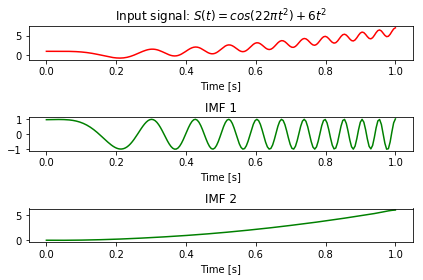

In [3]:
from PyEMD import EMD
import numpy  as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, 200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t

# Execute EMD on signal
IMF = EMD().emd(s,t)
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
#plt.show()

### EMD example 1 (EEMD)

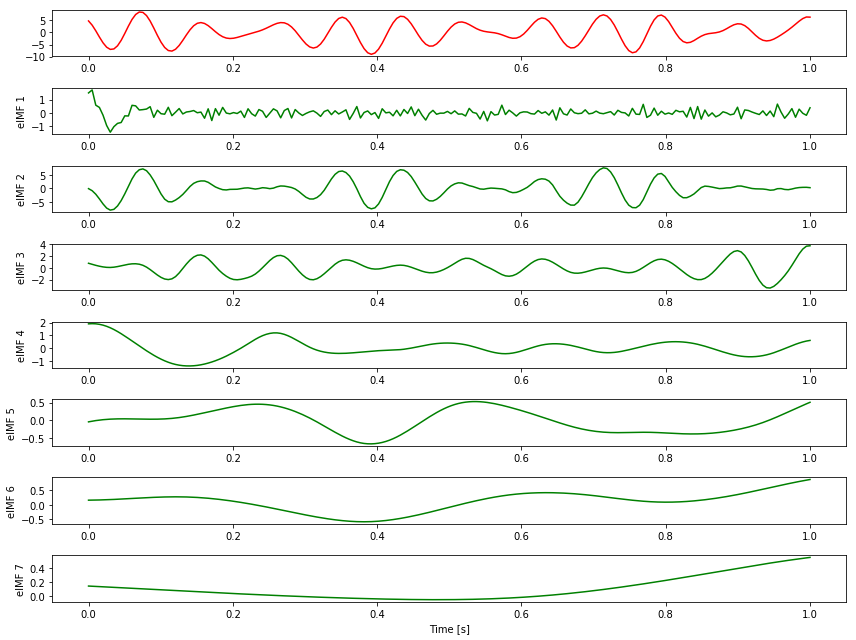

In [86]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, 200)

sin = lambda x,p: np.sin(2*np.pi*x*t+p)
S = 3*sin(18,0.2)*(t-0.2)**2
S += 5*sin(11,2.7)
S += 3*sin(14,1.6)
S += 1*np.sin(4*2*np.pi*(t-0.8)**2)
S += t**2.1 -t

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)

### EMD Example visualisation

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


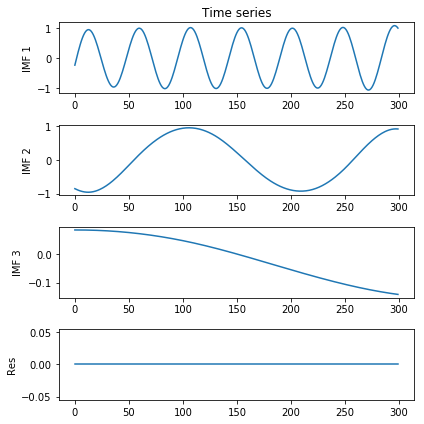

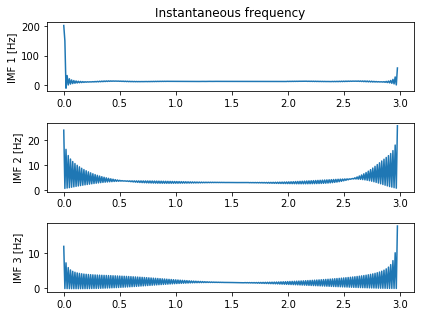

In [6]:
import numpy as np
from PyEMD import EMD, Visualisation

t = np.arange(0, 3, 0.01)
S = np.sin(13*t + 0.2*t**1.4) - np.cos(3*t)

emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()

vis = Visualisation(emd)
vis.plot_imfs()
vis.plot_instant_freq(t)
vis.show()

## Tests avec les données Engie

### Importation et chargement des données

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
import calendar
import seaborn as sns

In [10]:
df=pd.read_csv("../../ressources/engie/PV.csv", sep=";",decimal=",")
df["DATE"]=pd.to_datetime(df["DATE"])
df = df.set_index("DATE")

In [339]:
df_work = df.copy()
df_work = df_work.pivot(columns="INV", values=["Prod","Pred_self","Pred_neighbour","IRRADIANCE"])
df_work = df_work.fillna(value=0)
df_work = df_work.swaplevel(axis=1)
df_work = df_work.sort_index(level=0, axis=1, sort_remaining=True)
df_work.tail()

INV                 PVT01.INV01                                  PVT01.INV02  \
                     IRRADIANCE Pred_neighbour  Pred_self   Prod  IRRADIANCE   
DATE                                                                           
2018-11-11 16:10:00        58.9      38.425685  61.659967  39.46        58.9   
2018-11-11 16:20:00        62.6      46.378035  64.364344  47.17        62.6   
2018-11-11 16:30:00        56.0      41.711051  59.540320  42.55        56.0   
2018-11-11 16:40:00        34.3      21.942200  43.679514  23.42        34.3   
2018-11-11 16:50:00        41.6      20.953001  49.015177  22.86        41.6   

INV                                                  PVT02.INV01  \
                    Pred_neighbour  Pred_self   Prod  IRRADIANCE   
DATE                                                               
2018-11-11 16:10:00      39.024684  62.402160  40.66        58.9   
2018-11-11 16:20:00      46.809694  65.126225  48.55        62.6   
2018-11-11 16:30:00      42.225874  60.267083  43.74        56.0   
2018-11-11 16:40:00      22.854887  44.290813  23.70        34.3   
2018-11-11 16:50:00      22.173604  49.665318  22.85        41.6   

INV                                 ...   PVT03.INV02        PVT04.INV01  \
                    Pred_neighbour  ...     Pred_self   Prod  IRRADIANCE   
DATE                                ...                                    
2018-11-11 16:10:00      42.807199  ...     62.292343  39.10        58.9   
2018-11-11 16:20:00      50.260192  ...     64.993860  47.37        62.6   
2018-11-11 16:30:00      45.610695  ...     60.174938  42.43        56.0   
2018-11-11 16:40:00      25.925473  ...     44.330907  23.31        34.3   
2018-11-11 16:50:00      25.815154  ...     49.660927  22.68        41.6   

INV                                                  PVT04.INV02  \
                    Pred_neighbour  Pred_self   Prod  IRRADIANCE   
DATE                                                               
2018-11-11 16:10:00      41.235658  65.630894  40.69        58.9   
2018-11-11 16:20:00      48.069745  68.360107  48.14        62.6   
2018-11-11 16:30:00      43.564902  63.491781  43.68        56.0   
2018-11-11 16:40:00      23.554071  47.485315  23.81        34.3   
2018-11-11 16:50:00      23.270217  52.869979  24.74        41.6   

INV                                                   
                    Pred_neighbour  Pred_self   Prod  
DATE                                                  
2018-11-11 16:10:00      38.356931  64.119070  41.76  
2018-11-11 16:20:00      45.755051  66.830975  48.09  
2018-11-11 16:30:00      41.337550  61.993524  43.54  
2018-11-11 16:40:00      21.587403  46.088573  23.64  
2018-11-11 16:50:00      21.705618  51.439086  23.83  

[5 rows x 32 columns]

### EMD

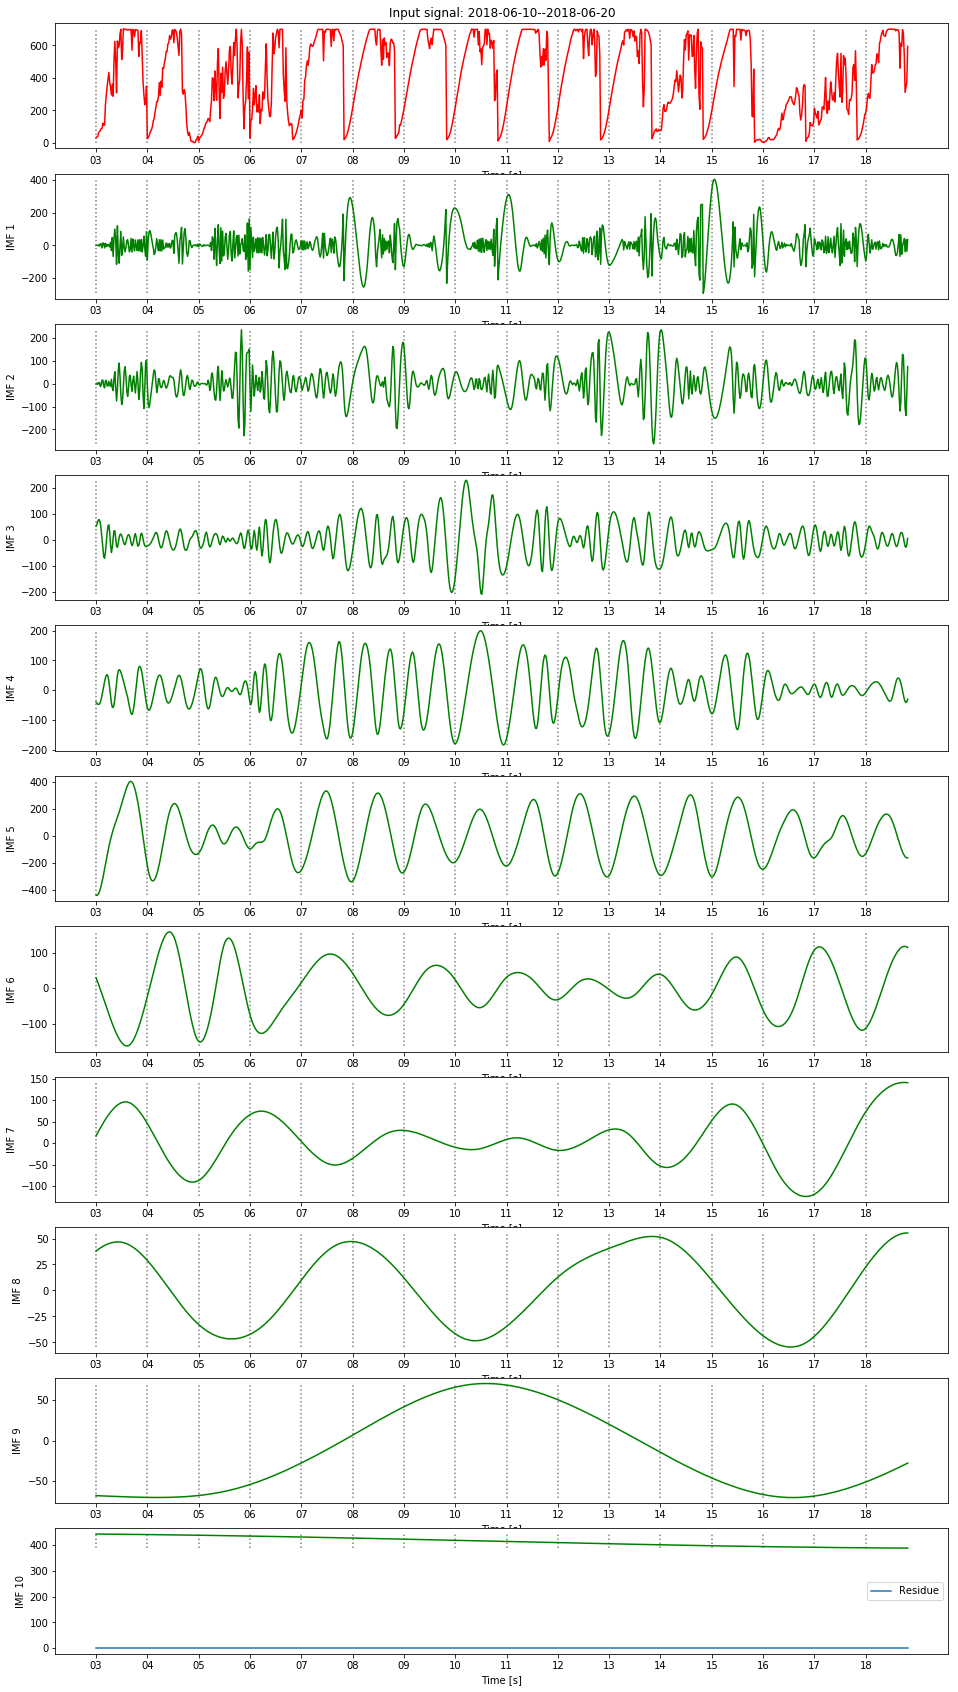

In [370]:
# Execute EMD on signal
signal = df_work["2018-07-03":"2018-07-18"]
t = np.arange(len(signal))
s = np.array(signal["PVT02.INV01","Prod"]) # - signal["PVT01.INV01","Pred_neighbour"])
#s = (s - s.mean())/s.std()

# valeurs des seuils
config = {"std_thr": 1.2, "svar_thr": 0.001, "total_power_thr": 0.005, "range_thr": 0.001}
emd = EMD(**config)
emd.extrema_detection = "parabol"
IMF = emd.emd(s,t)
N = IMF.shape[0]+1

# Plot results
plt.figure(figsize=(16,30))
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: 2018-06-10--2018-06-20")
plt.xlabel("Time [s]")
plt.xticks(t[::60],signal.index[t[::60]].strftime("%d"))
plt.vlines(t[::60], ymin=s.min(), ymax=s.max(), colors="gray", linestyles='dotted')

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.ylabel("IMF "+str(n+1))
    plt.xlabel("Time [s]")
    plt.xticks(t[::60],signal.index[t[::60]].strftime("%d"))
    plt.vlines(t[::60], ymin=imf.min(), ymax=imf.max(), colors="gray", linestyles='dotted')

plt.plot(t, emd.residue, label="Residue")
plt.legend()
#plt.tight_layout()
plt.savefig('../simple_example.png')

### Visualisation

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


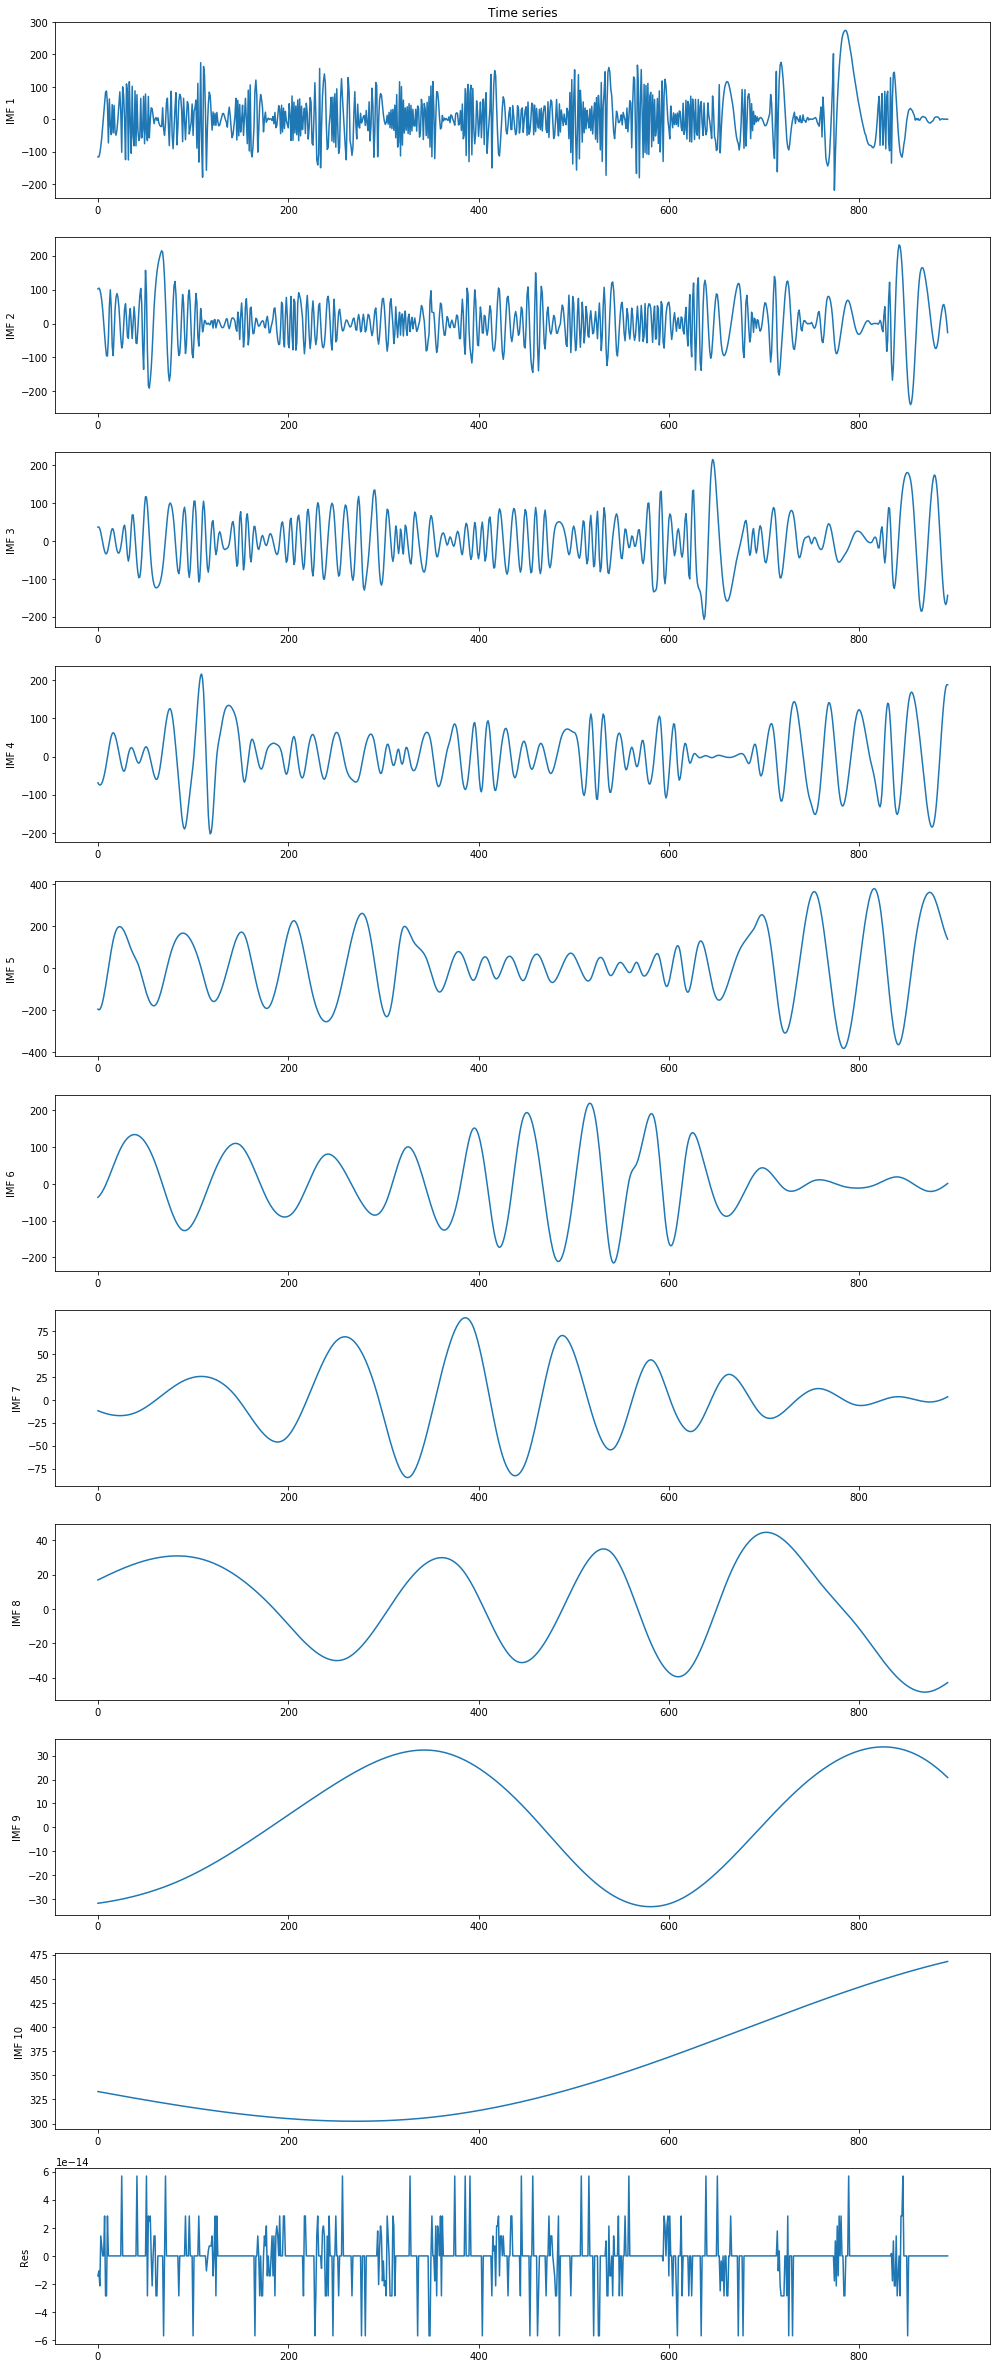

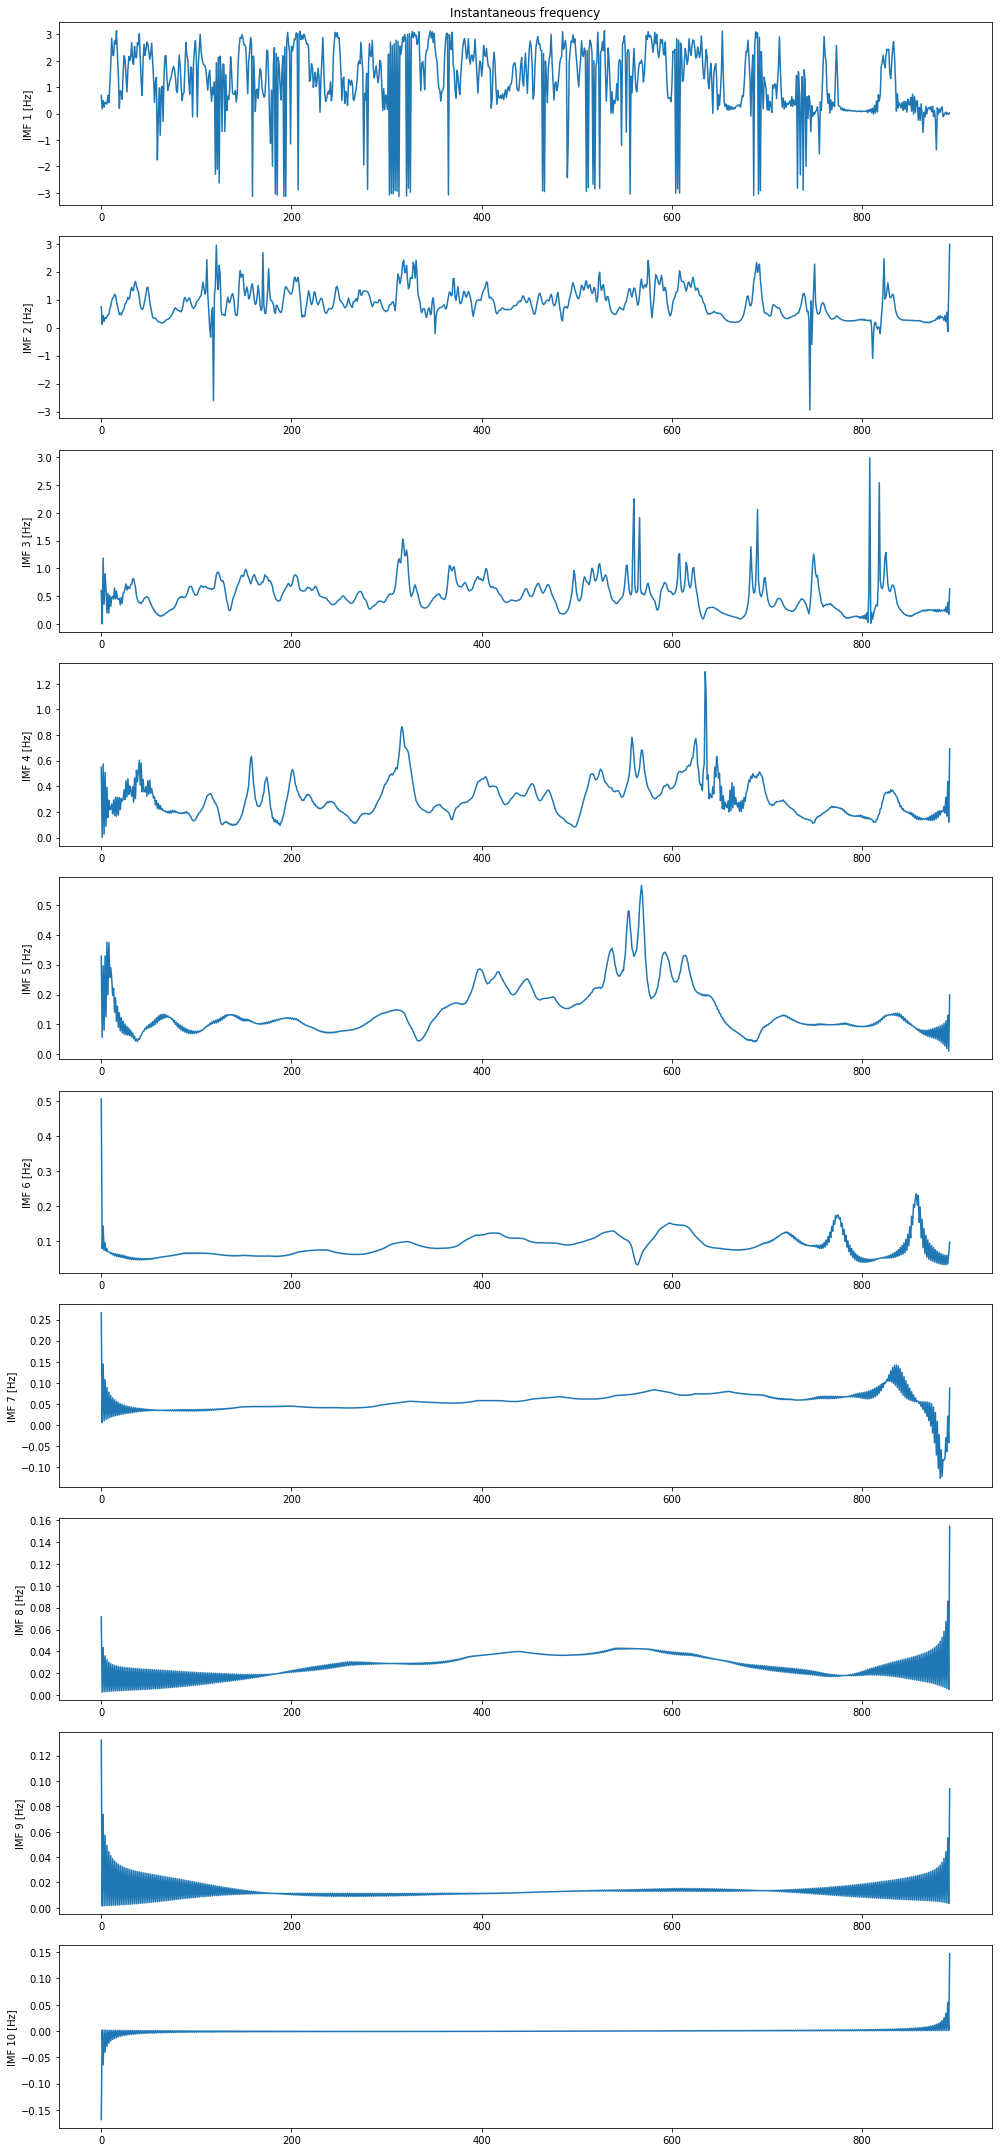

In [357]:
imfs, res = emd.get_imfs_and_residue()

vis = Visualisation(emd)
vis.PLOT_HEIGHT_PER_IMF=3
vis.PLOT_WIDTH=14
vis.plot_imfs()
vis.plot_instant_freq(t)
vis.show()

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


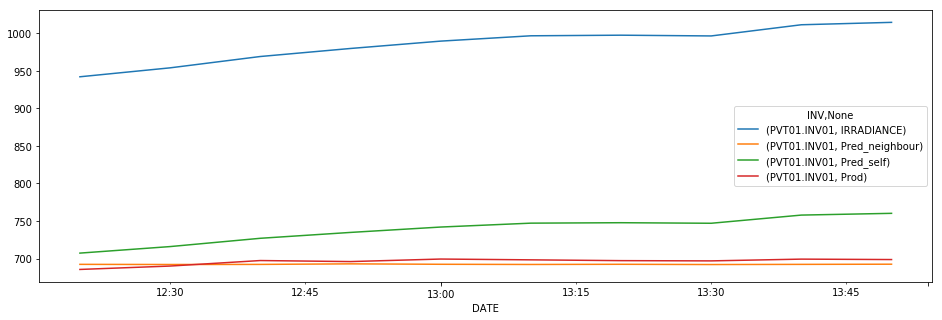

In [208]:
# On récupère la liste des fréquences
imfs_inst_freqs = vis._calc_inst_freq(imfs, t)

# On peut regarder si on trouve quelque chose pour les valeurs extrêmes
ind = imfs_inst_freqs[3].argmin()
ind2 = imfs[3].argmax()
df_work["2018-06-08":"2018-06-20"].iloc[ind2-5:ind2+5,:4].plot(figsize=(16,5))

### EEMD

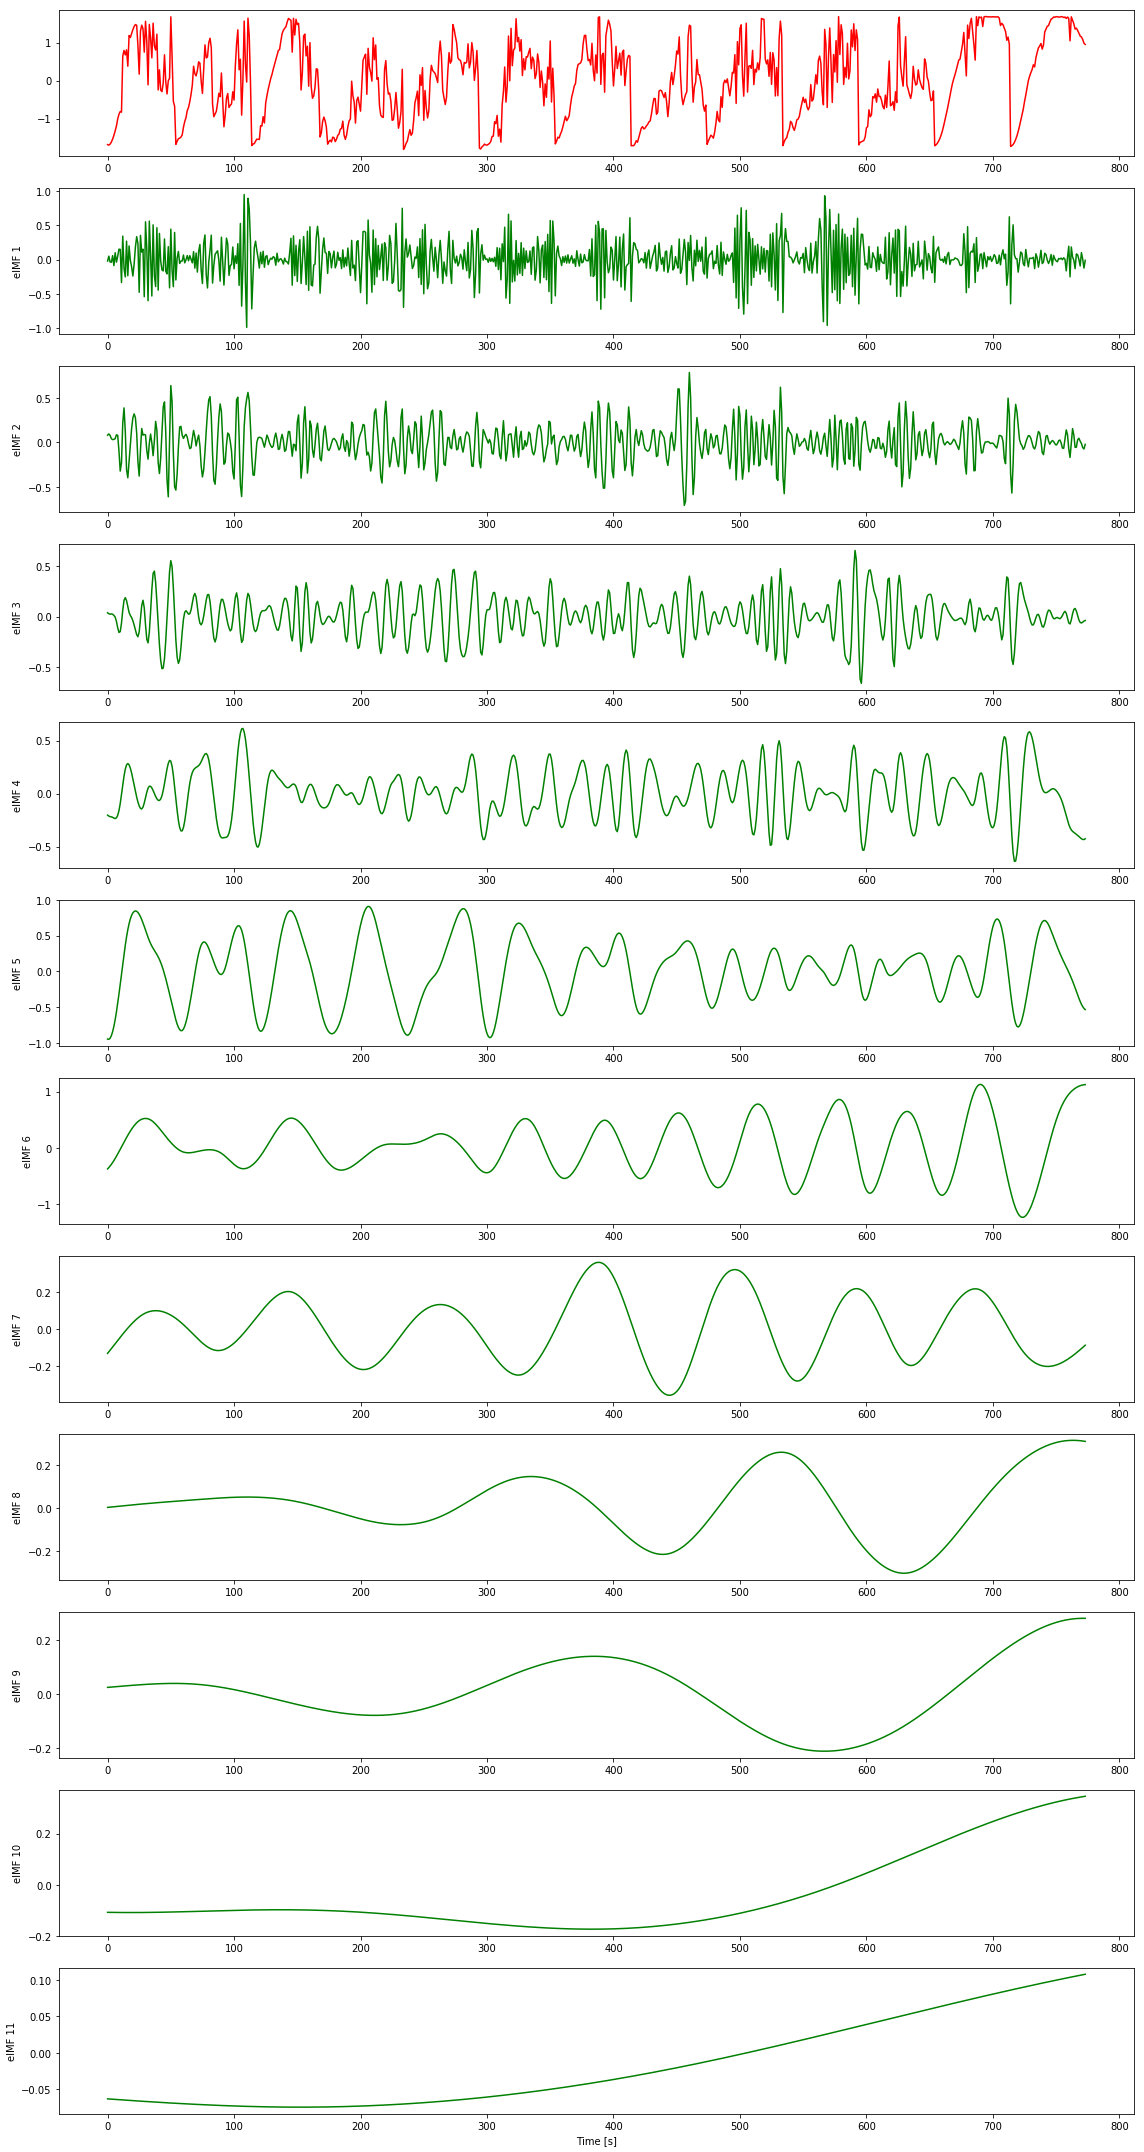

Process ForkPoolWorker-91:
Process ForkPoolWorker-90:
Process ForkPoolWorker-92:
Process ForkPoolWorker-89:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self

In [210]:
# Define signal
t = np.arange(len(df_work["2018-06-08":"2018-06-20"]))
s = np.array(df_work["2018-06-08":"2018-06-20"]["PVT01.INV01","Prod"])
s = (s - s.mean())/s.std()

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(s, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(16,30))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('../eemd_example.png', dpi=120)

### Visualisation

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


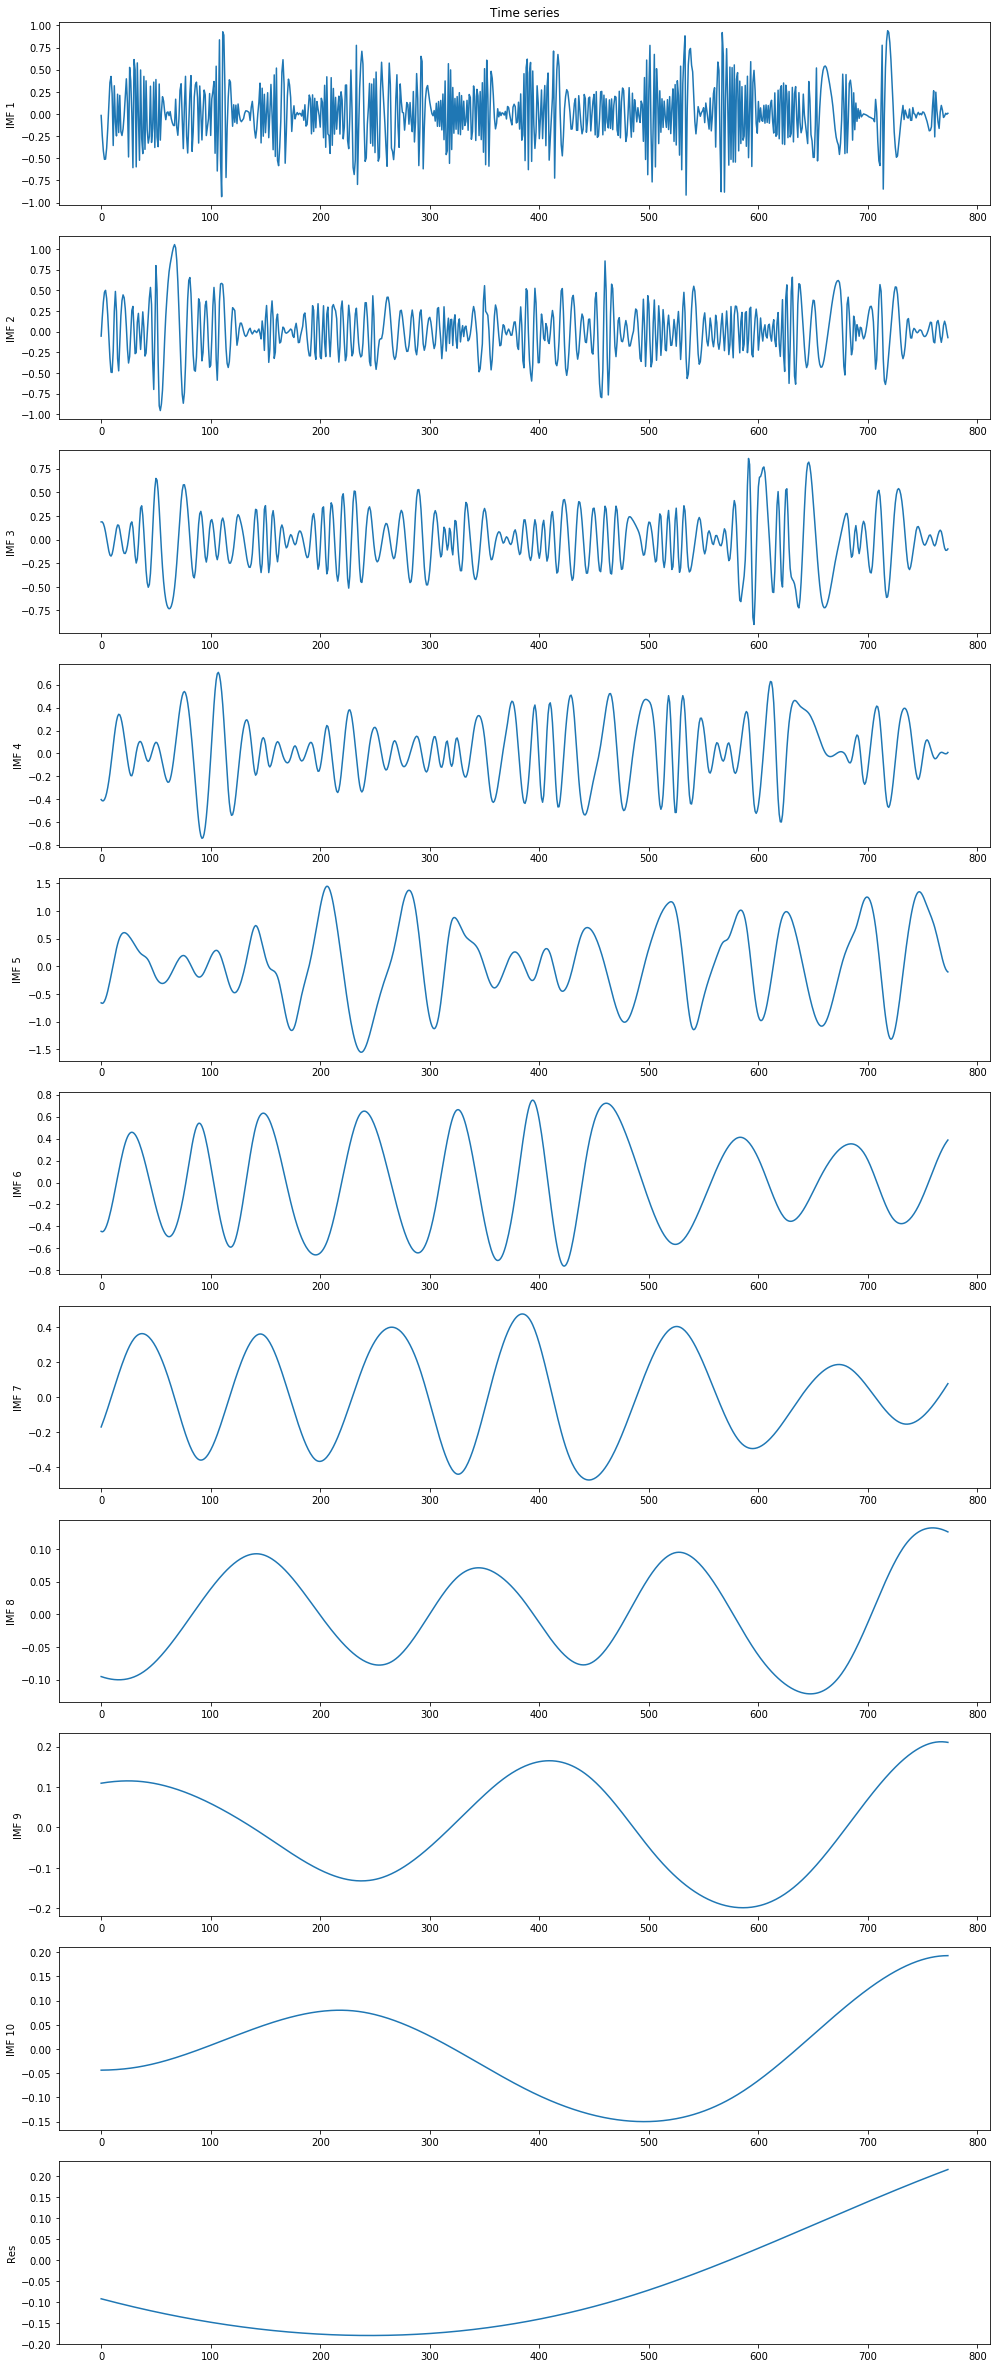

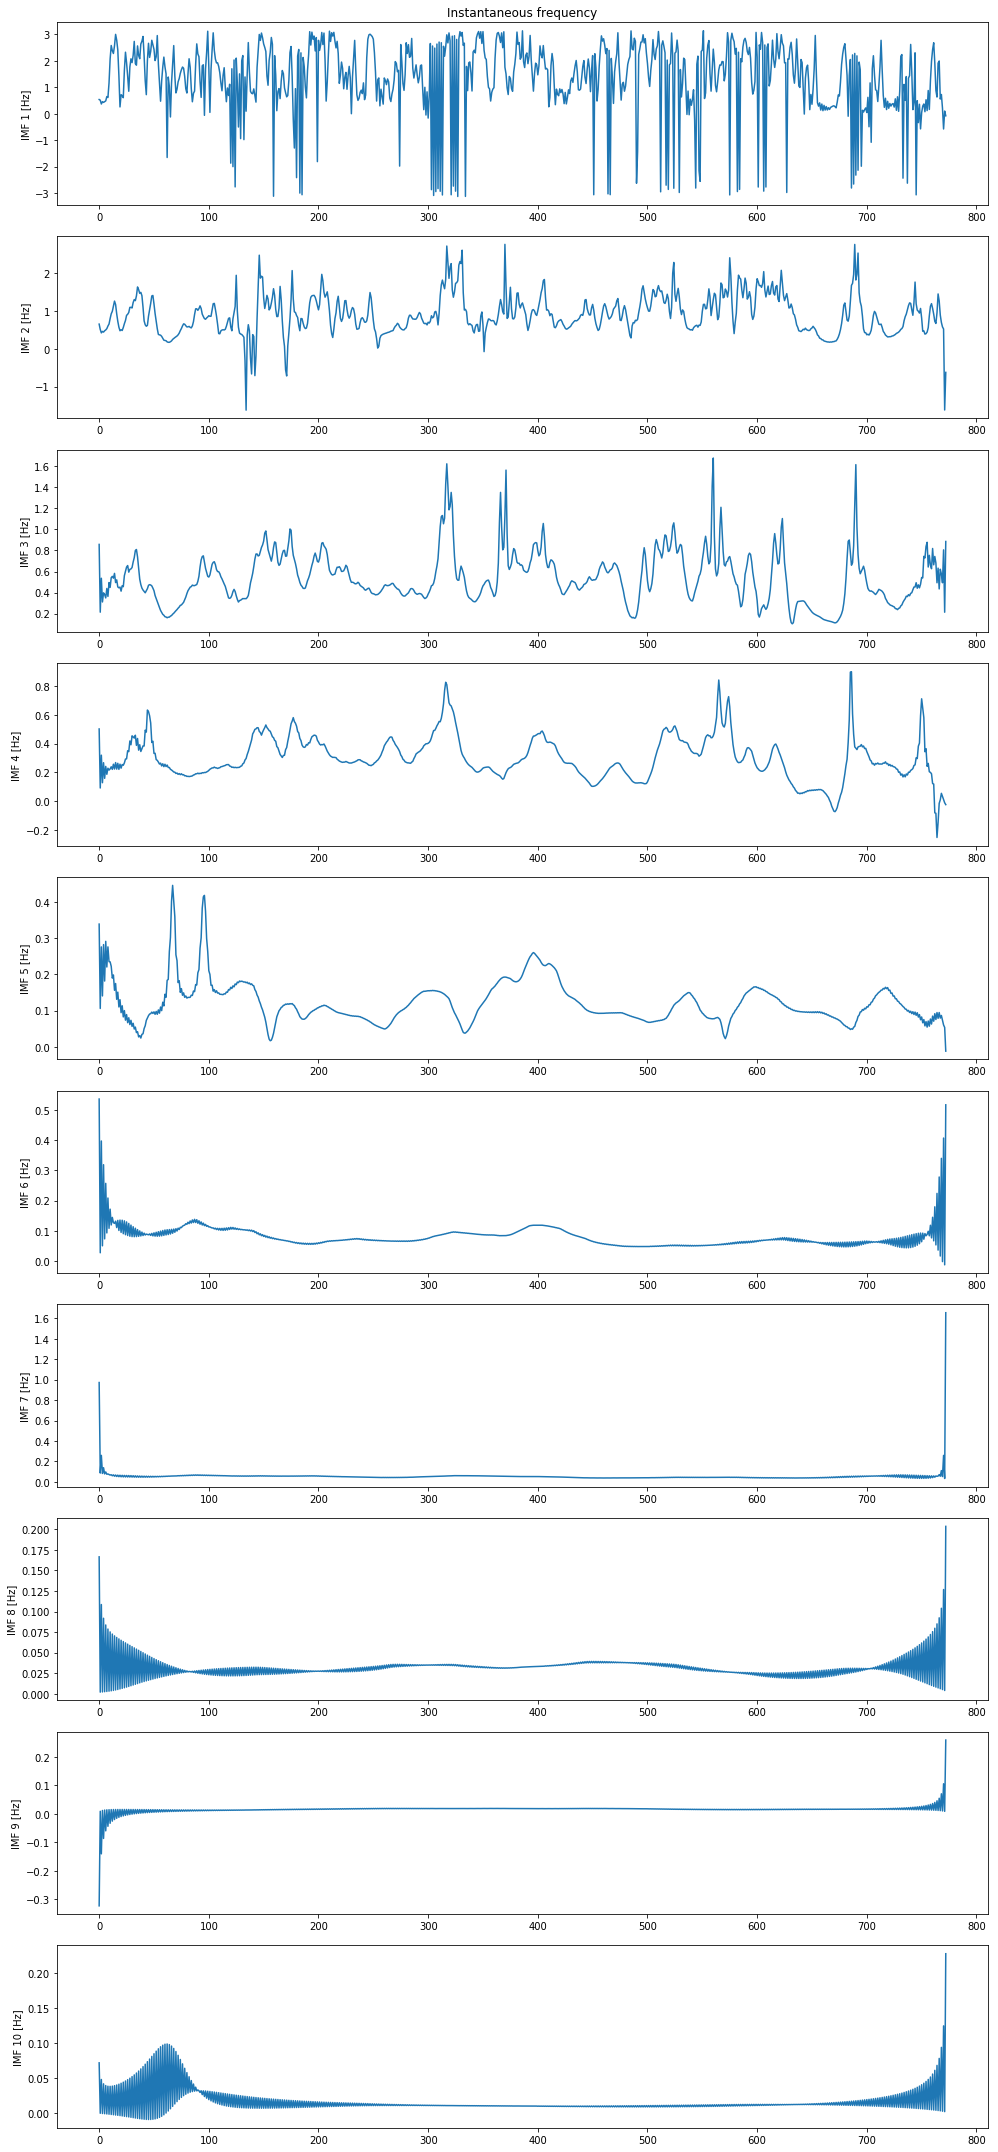

In [104]:
imfs, res = emd.get_imfs_and_residue()

vis = Visualisation(emd)
vis.PLOT_HEIGHT_PER_IMF=3
vis.PLOT_WIDTH=14
vis.plot_imfs()
vis.plot_instant_freq(t)
vis.show()

### CEEMAN

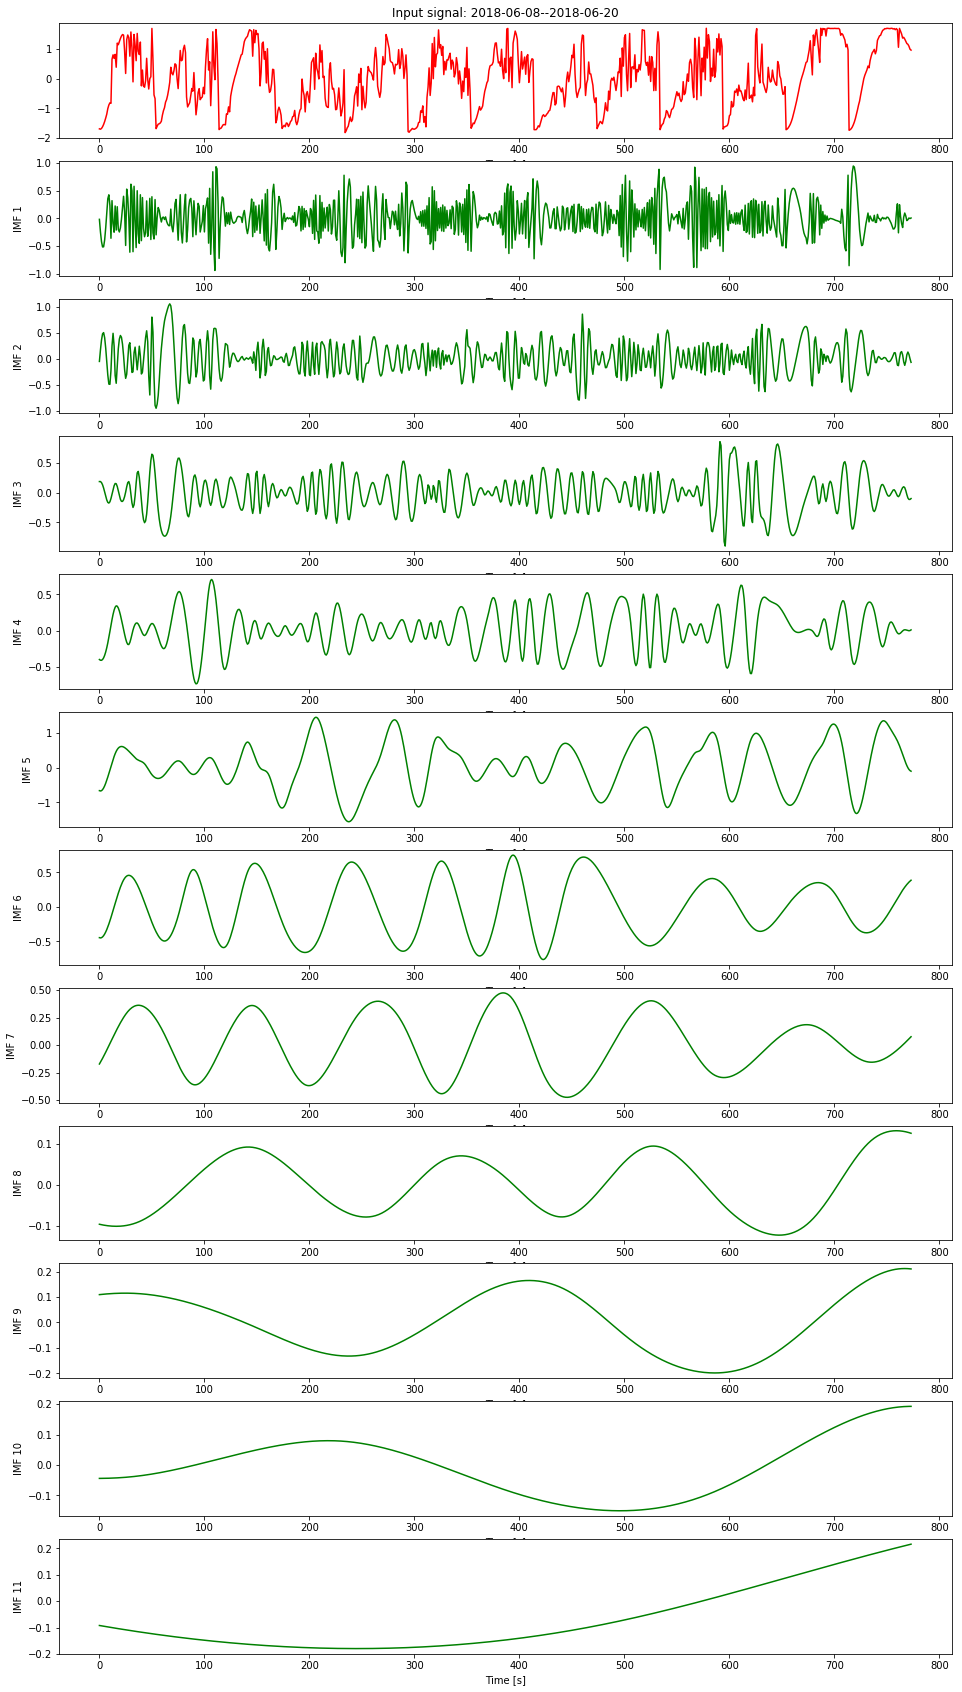

Process ForkPoolWorker-77:
Process ForkPoolWorker-78:
Process ForkPoolWorker-80:
Process ForkPoolWorker-79:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self

In [101]:
from PyEMD import CEEMDAN
# Execute EMD on signal
t = np.arange(len(df_work["2018-06-08":"2018-06-20"]))
s = np.array(df_work["2018-06-08":"2018-06-20"]["PVT01.INV01","Prod"])
s = (s - s.mean())/s.std()

ceemdan = CEEMDAN()
cIMFs = ceemdan(s)
ceemdan.extrema_detection = "parabol"
cIMFs = ceemdan.emd(s,t)
N = cIMFs.shape[0]+1

# Plot results
plt.figure(figsize=(16,30))
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: 2018-06-08--2018-06-20")
plt.xlabel("Time [s]")

for n, imf in enumerate(cIMFs):
    #plt.figure(figsize=(16,30))
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.ylabel("IMF "+str(n+1))
    plt.xlabel("Time [s]")

#plt.tight_layout()
plt.savefig('../simple_example2.png')